## Waiter Tips Prediction

Tipping waiters for serving food depends on many factors like type of restaurant, how many people you are with, how much amount you pay as your bill, etc. Waiter Tips analysis is one of the popular data science case studies where we need to predict the tips given to a waiter for serving the food in a restaurant. 

### Waiter Tips(Case Study)

The food server of a restaurant recorded data about the tips given to the waiters for serving the food. The data recorded by the food server is as follow:

1. <b>total_bill:</b> Total bill in dollars including taxes
2. <b>tip:</b> Tip given to waiters in dollars
3. <b>sex:</b> Gender of the person paying the bill
4. <b>smoker:</b> Whether the person smoked or not
5. <b>day:</b> day of the week
6. <b>time:</b> lunch or dinner
7. <b>size:</b> Number of people in a table


So this is the data recorded by the restaurant. Based on this data, our task is to find the factors affecting waiter tips and tips and train a machine learning model to predict the waiter's tipping.

In [18]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
# URL of the CSV file
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/tips.csv"

# Read the CSV file from the URL
df = pd.read_csv(url)

# Save the file locally
df.to_csv("tips.csv", index=False)

In [3]:
data=pd.read_csv("tips.csv")

In [4]:
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Waiter Tips Analysis


let's have a look at the tips given to the waiters according to:

1. The total bill paid
2. Number of people at a table
3. And the day of the week

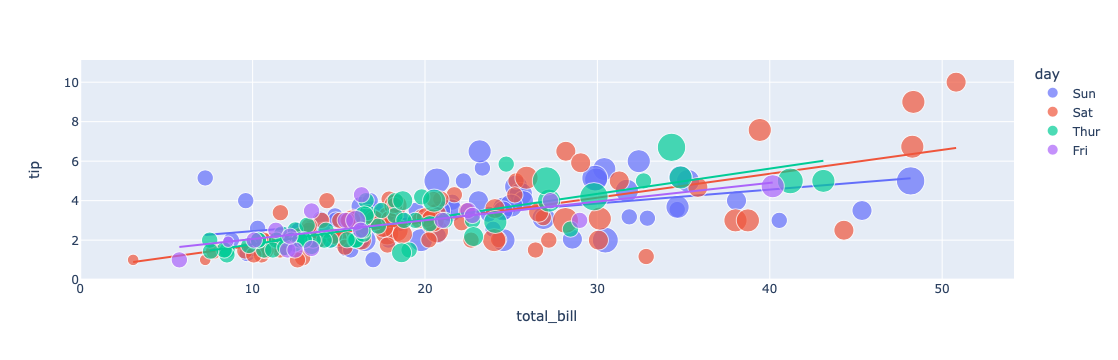

In [7]:
figure= px.scatter(data_frame= data, x="total_bill", y="tip", size="size", color="day", trendline="ols",)

figure.show()

Now let's have a look at the tips given to the waiters according to:

1. The total bill paid
2. The number of people at a table
3. And the gender of the person paying the bill

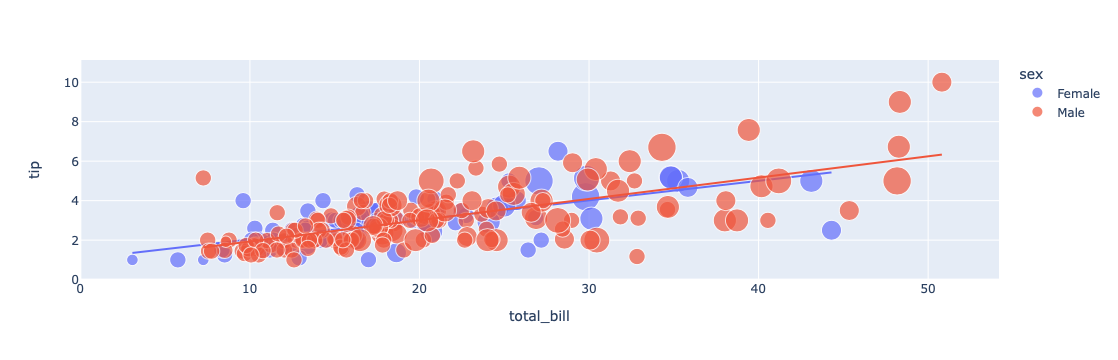

In [8]:
figure= px.scatter(data_frame= data, x="total_bill", y="tip", size="size", color="sex", trendline="ols",)

figure.show()

Now let's have a look at the tips given to the waiters according to:

1. The total bill paid
2. The number of people at a table
3. And the time of the meal

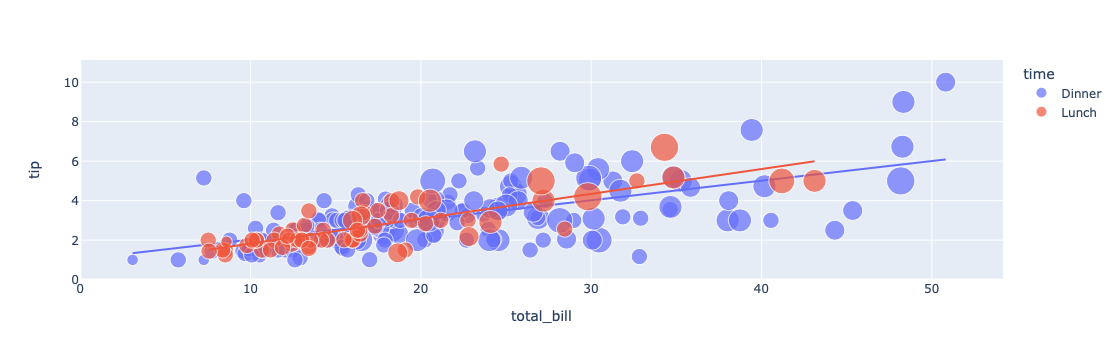

In [9]:
figure= px.scatter(data_frame= data, x="total_bill", y="tip", size="size", color="time", trendline="ols",)

figure.show()

Now let's see the tips given to the waiters according to the days to find out which day the most tips are given to the waiters:

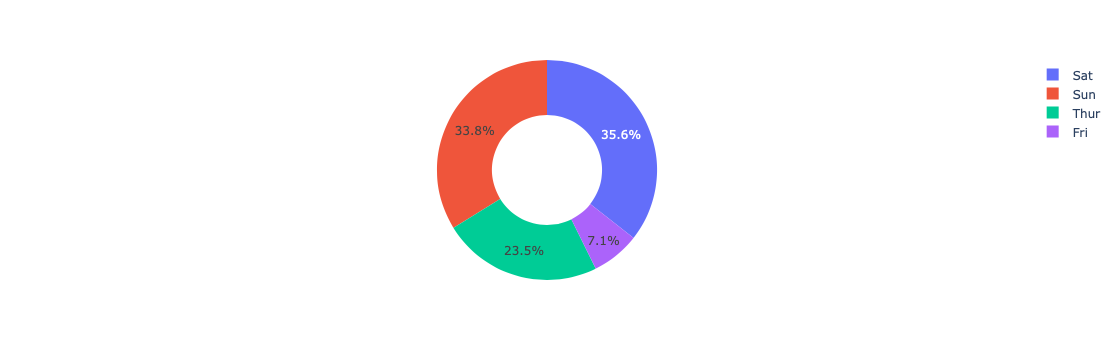

In [10]:
figure = px.pie(data, values="tip", names= "day", hole= 0.5)
figure.show()

According to the visualisation above, on saturdays, most tips are given to the waiters. Now let's look at the number of tips given to waiters by gender of the person paying the bill to see who tips waiter the most:

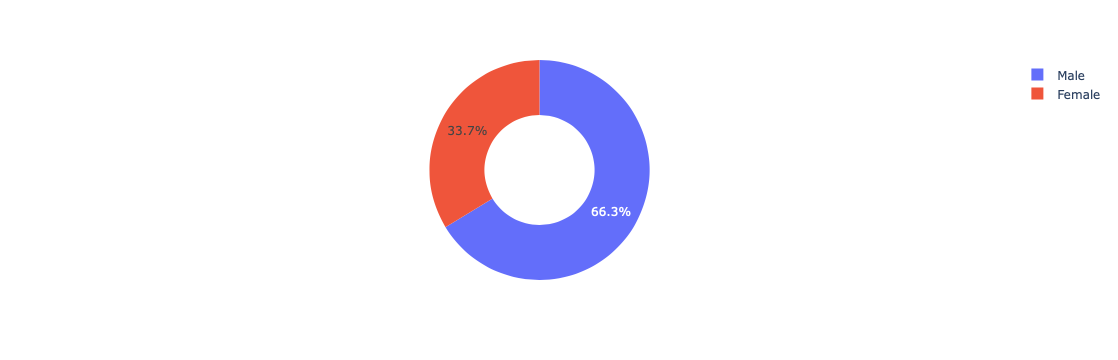

In [11]:
figure= px.pie(data, values="tip", names="sex", hole = 0.5)
figure.show()

According to the visualization above, most tips are given by men. Let's see if a smoker tips more or a non-smoker:

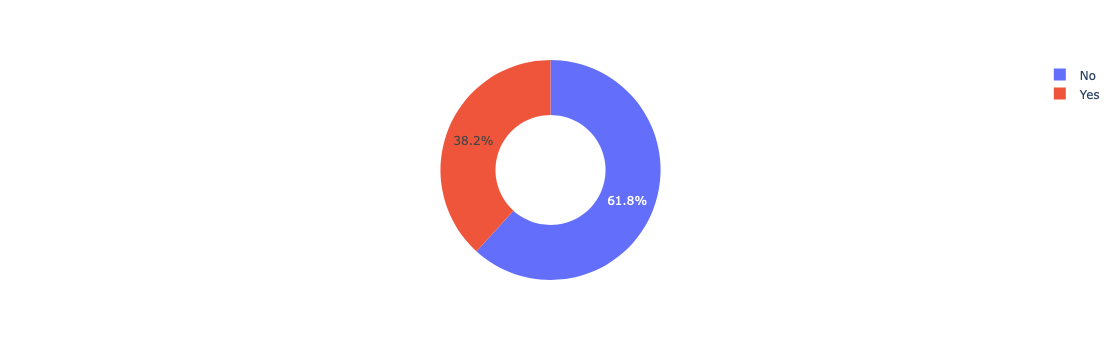

In [12]:
figure= px.pie(data, values= "tip", names= "smoker", hole= 0.5)
figure.show()

According to the visualisation above, non-smoker tips waiters more than smokers. Now let's see if most tips are given during lunch or dinner:

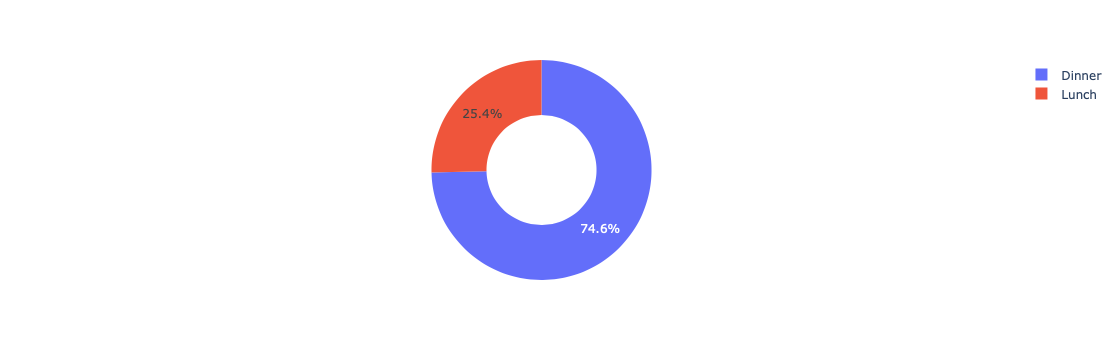

In [13]:
figure= px.pie(data, values= "tip", names= "time", hole= 0.5)
figure.show()

According to the visualization above, a waiter is tipped more during dinner.


So this is how we can analyse all the factors affecting waiter tips. Now in the section below, I will take you through how to train a machine learning model for the task of waiter tips pediction.

### Waiter Tips Prediction Model:

Before training a waiter tips prediction model, i will do some data transformation by transforming the categorical values into numerical values:

In [14]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4


Now i will split the data into training and test sets:

In [16]:
x= np.array(data[["total_bill", "sex", "smoker", "day", "time", "size"]])

y = np.array(data[["tip"]])

In [17]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size= 0.2, random_state= 42)

Now below is how we can train a machine learning model for the task of waiter tips prediction using python:

In [19]:
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

Now let's test the performance of this model by giving inputs to this model according to the features that we have used to train this model:

In [20]:
#features = [["total_bill", "sex","smoker", "day", "time", "size"]]
features = np.array([[24.50, 1, 0, 0, 1, 4]])
model.predict(features)

array([[3.73742609]])

### Summary:

So this is how you can predict waiter tips with machine learning using python. Waiter tips analysis is one of the popular data science case studies where we need to predict the tips given to a waiter for serving the food in a resturant.